In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_excel("Book5.xlsx")
dataset.head(6)

,bed,bathr,s-living,s-lot,floor,wf,v,con,sa,sb,yb,yr,price
0,2,1.50,1340,7912,1.2,0,0,3,1340,0,1921,2005,313000.0
1,3,2.50,1350,9050,2.0,0,0,2,1350,280,1923,0,2384000.0
2,4,2.00,1930,11947,1.0,0,0,4,1930,0,1925,0,342000.0
3,5,2.25,2000,8030,1.0,0,0,5,2000,1000,1927,0,420000.0
4,6,2.50,1940,10500,1.0,0,0,3,1940,800,1929,1992,550000.0
5,2,1.00,800,6380,2.0,0,0,2,800,0,1931,1994,4900000.0


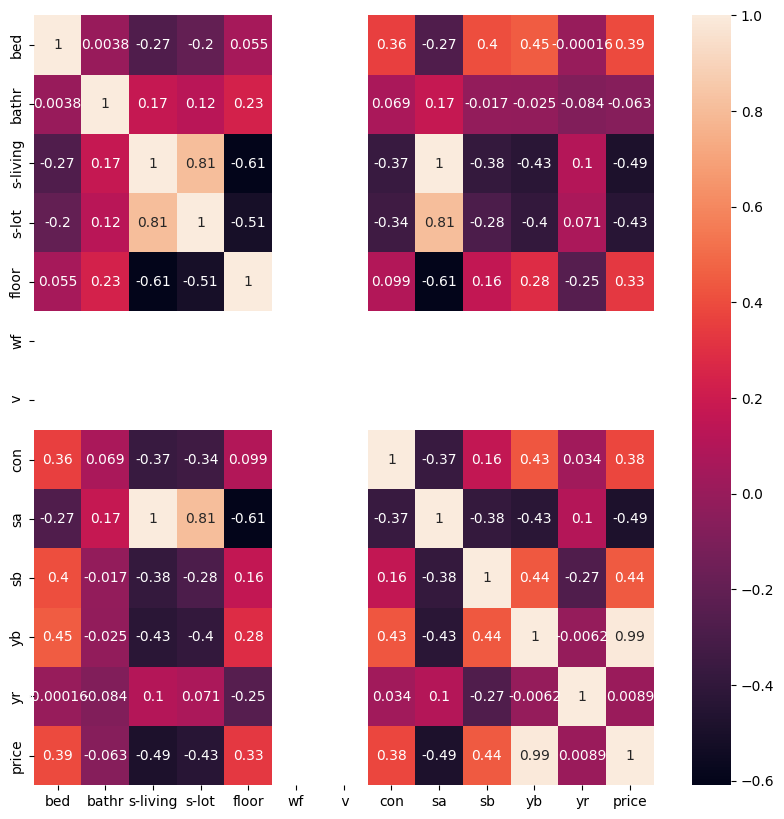

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [8]:
x= dataset.iloc[:,:-1]
y= dataset["price"]

In [11]:
sc= StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)


In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# LinearRegression

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
lr.score(x_test,y_test)*100

94.59035840304857

In [17]:
lr.coef_

array([-3.13745828e+05, -7.39733217e+04, -3.44183064e+05,  2.16812664e+05,
        7.29034602e+04,  0.00000000e+00,  2.32830644e-10, -3.28405126e+05,
       -3.44183064e+05,  1.30267711e+05,  4.38050352e+06,  6.10485979e+04])

In [24]:
x.columns

Index(['bed', 'bathr', 's-living', 's-lot', 'floor', 'wf', ' v', 'con', 'sa',
       'sb', 'yb', 'yr'],
      dtype='object')

In [43]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

639817497892.7328
671756.1139508977
799885.928050202


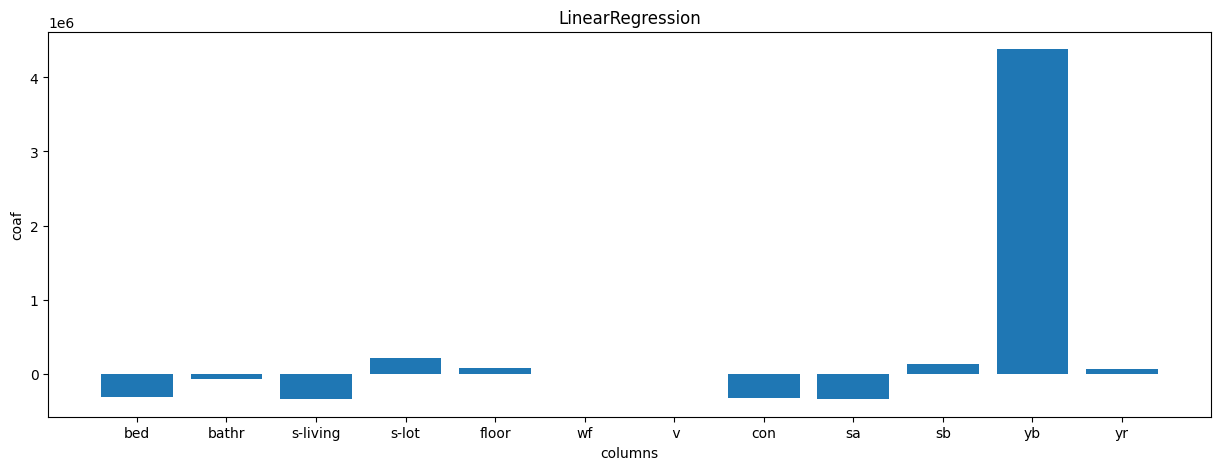

In [27]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coaf")
plt.show()

### Leso

In [33]:
la = Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100 

94.59035923672681

In [44]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

639817399290.6519
671756.0740648314
799885.8664151104


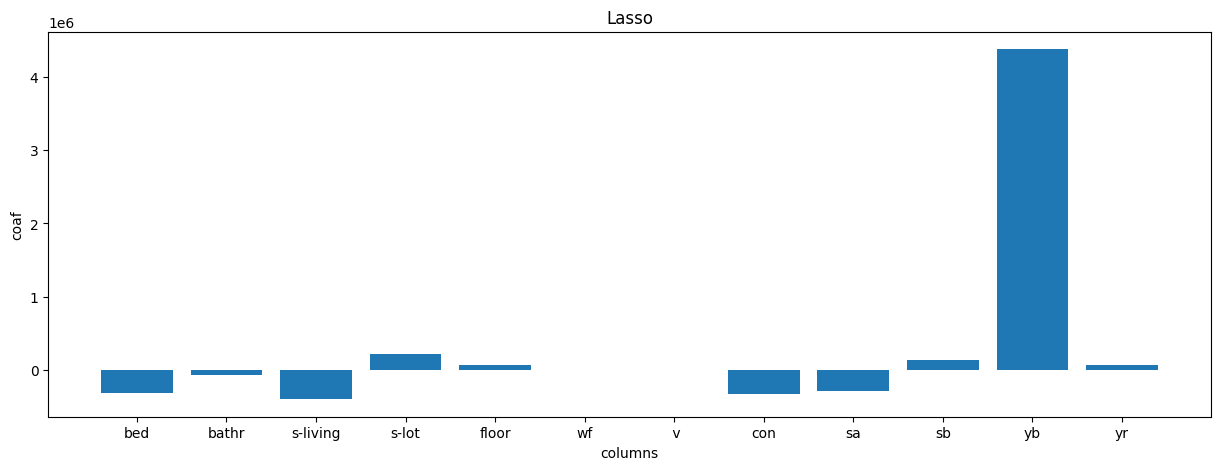

In [45]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coaf")
plt.show()

### Ridge

In [35]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

91.69987853414828

In [46]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

981684803569.934
921117.5180021689
990800.0825443718


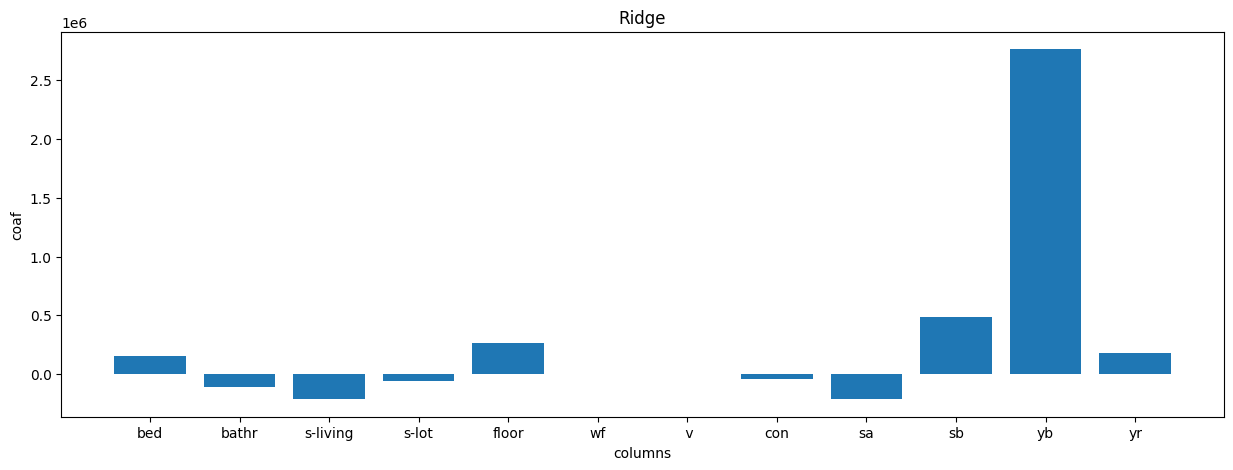

In [37]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coaf")
plt.show()

In [47]:
df= pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,bed,-3.137458e+05,-3.137458e+05,1.579633e+05
1,bathr,-7.397332e+04,-7.397331e+04,-1.130909e+05
2,s-living,-3.441831e+05,-4.011156e+05,-2.138145e+05
3,s-lot,2.168127e+05,2.168126e+05,-5.731584e+04
4,floor,7.290346e+04,7.290345e+04,2.621864e+05
5,wf,0.000000e+00,0.000000e+00,0.000000e+00
6,v,2.328306e-10,0.000000e+00,0.000000e+00
7,con,-3.284051e+05,-3.284051e+05,-3.782262e+04
8,sa,-3.441831e+05,-2.872505e+05,-2.138145e+05
9,sb,1.302677e+05,1.302677e+05,4.895065e+05
